# Imports

In [5]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Load and Inspect the Data

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [7]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

/tmp/ipython-input-489960966.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


Text(0, 0.5, 'Count')

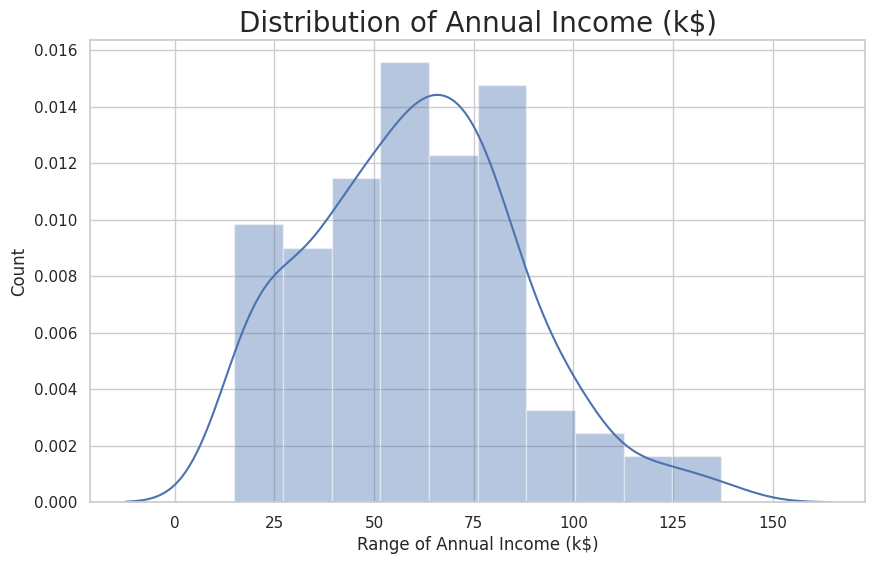

In [8]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

/tmp/ipython-input-2075078199.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


Text(0, 0.5, 'Count')

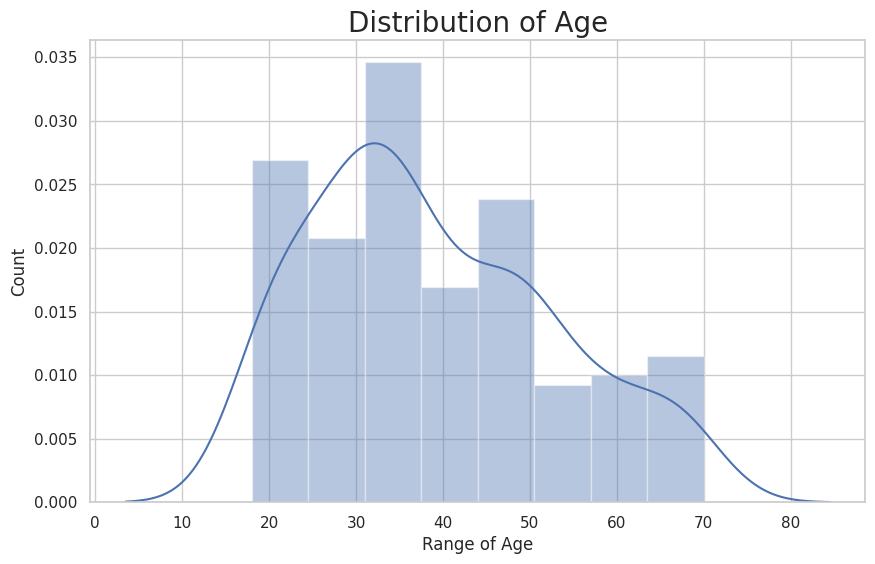

In [9]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

/tmp/ipython-input-2897587065.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

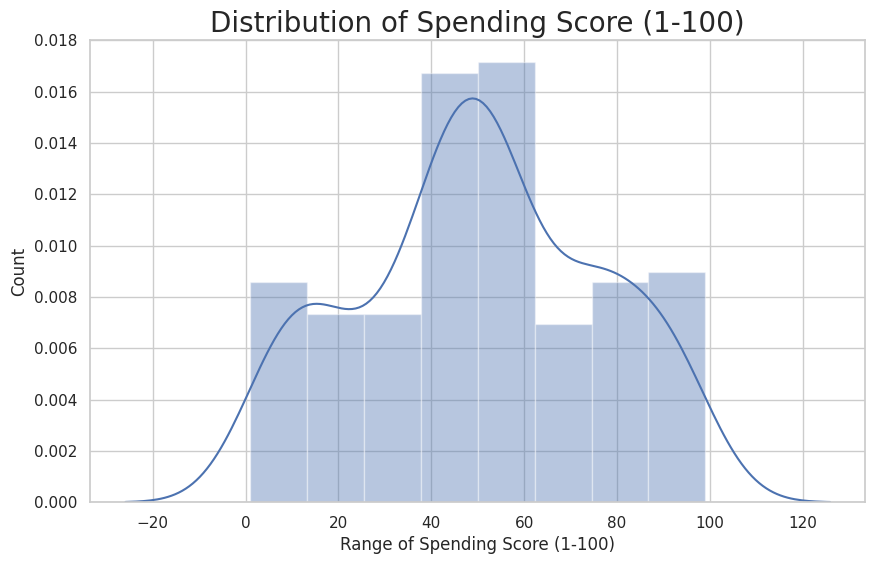

In [10]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

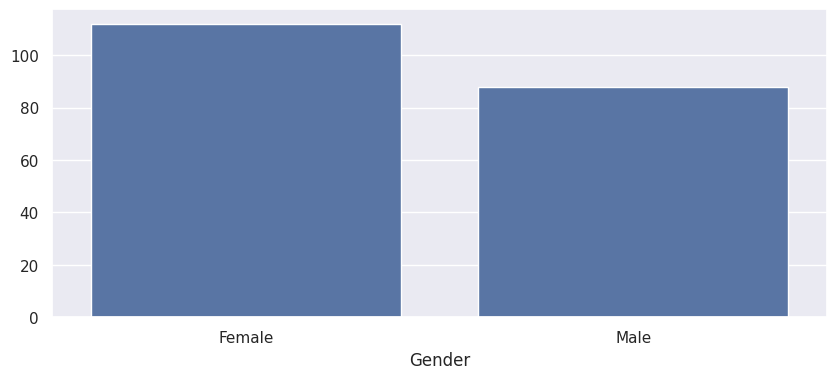

In [11]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [12]:
# We take just the Annual Income and Spending score
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [13]:
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


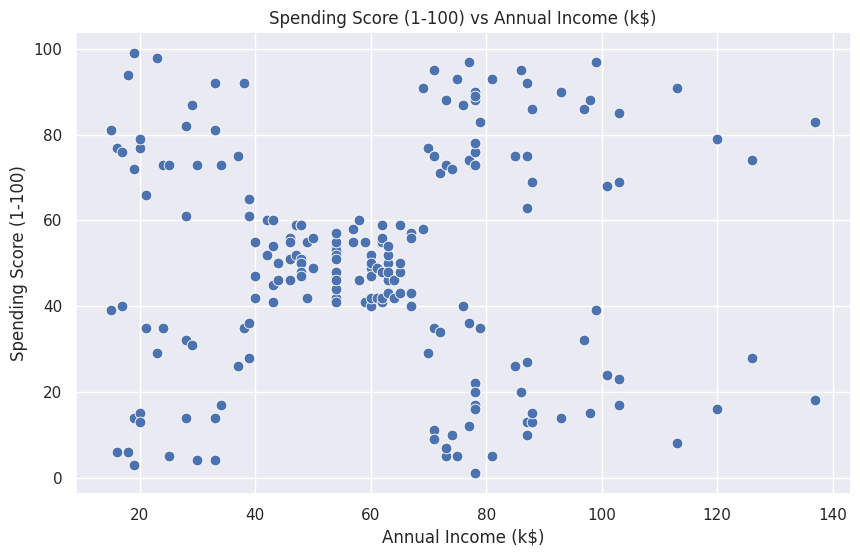

In [14]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# 2D Clustering (Based on 2 Features)

In [15]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

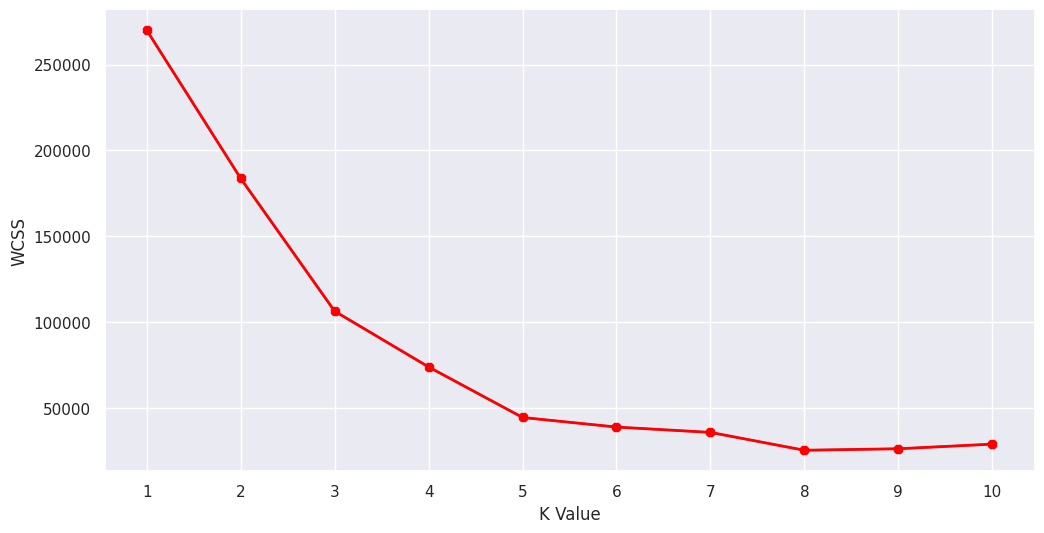

In [16]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [17]:
#Taking 5 clusters
km1 = KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y = km1.predict(X)
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


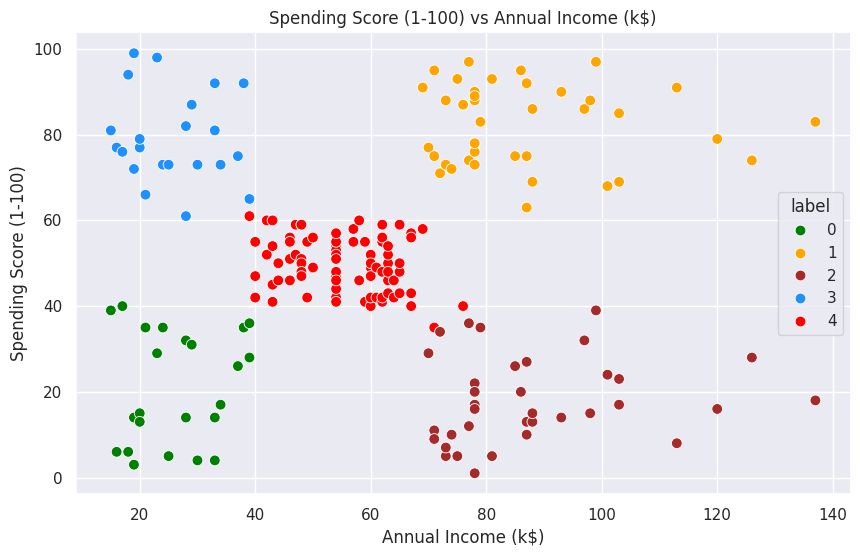

In [18]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# 3D Clustering (Based on 3 Features)

In [19]:
df1 = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [20]:
# Taking the features
X1 = df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
# Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

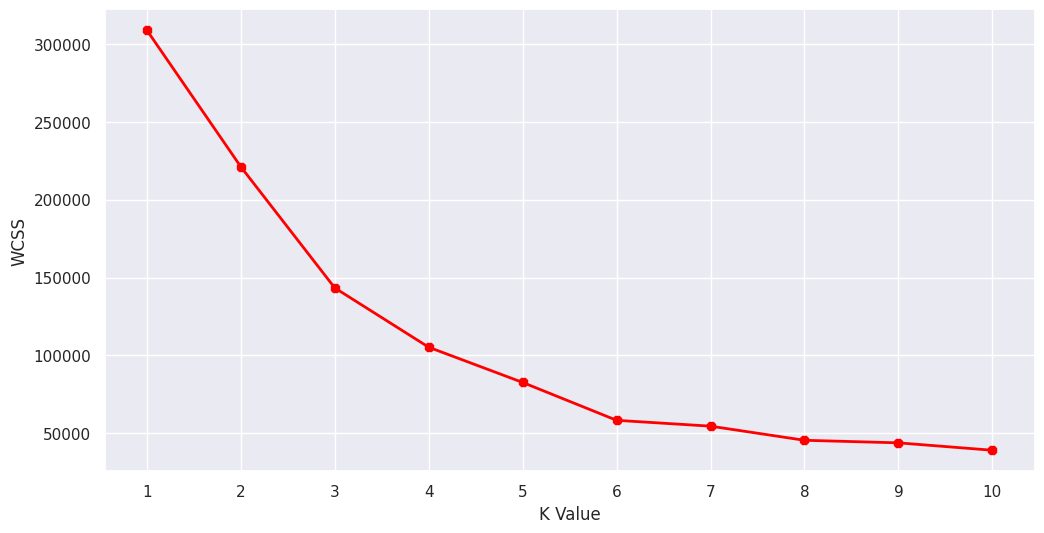

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [22]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X1)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,6
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


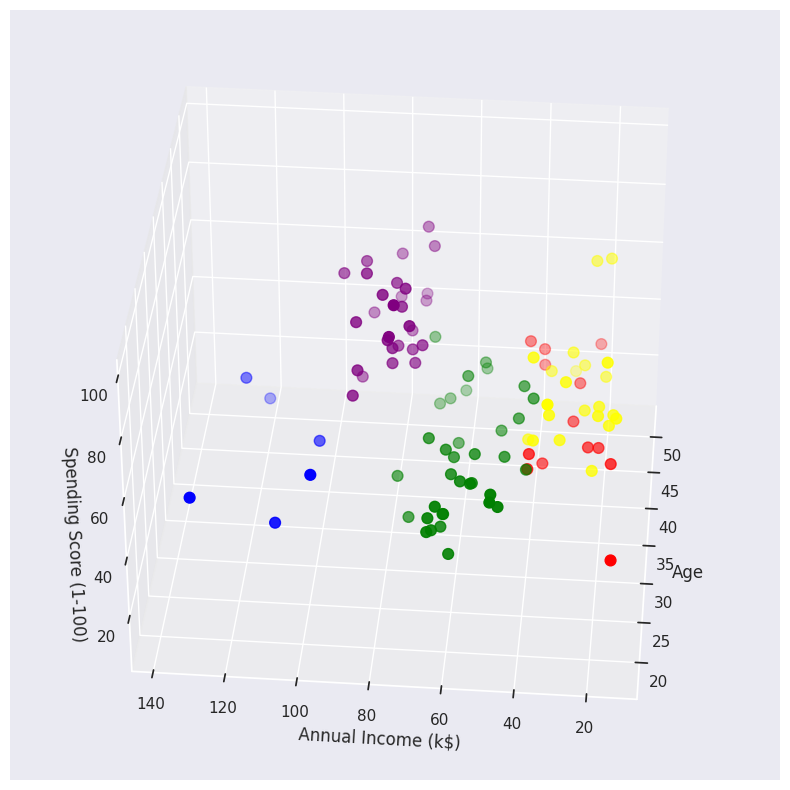

In [23]:
# 3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)

ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# DBSCAN Clustering

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize features by scaling them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
# eps = A point is considered a neighbor of another if the distance between them is 0.5 or less.
# min_samples = A point must have at least 20 neighbors (including itself) within a distance of 0.5 to be considered a core point, which is essential for forming a cluster.

dbscan = DBSCAN(eps=0.5, min_samples=20)
clusters = dbscan.fit_predict(X_scaled)

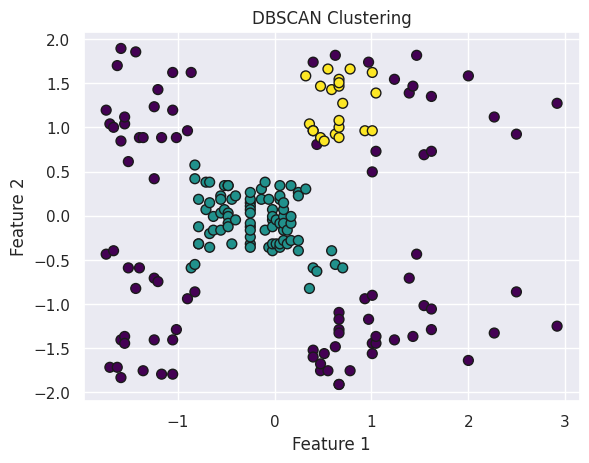

In [25]:
# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [26]:
# Print the number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 2
Estimated number of noise points: 91


# Comparison between 3 Approaches

In [27]:
# Compare the number of clusters and noise points
print("K-Means (2D):")
print(f"Number of clusters: {df['label'].nunique()}")
print("Number of noise points: 0 (K-Means does not identify noise points)")
print("\n")

print("K-Means (3D):")
print(f"Number of clusters: {df1['label'].nunique()}")
print("Number of noise points: 0 (K-Means does not identify noise points)")
print("\n")

print("DBSCAN:")
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

K-Means (2D):
Number of clusters: 5
Number of noise points: 0 (K-Means does not identify noise points)


K-Means (3D):
Number of clusters: 10
Number of noise points: 0 (K-Means does not identify noise points)


DBSCAN:
Estimated number of clusters: 2
Estimated number of noise points: 91


In [28]:
# Create a summary table
summary_data = {
    'Clustering Method': ['K-Means (2D)', 'K-Means (3D)', 'DBSCAN'],
    'Number of Clusters': [df['label'].nunique(), df1['label'].nunique(), n_clusters],
    'Number of Noise Points': [0, 0, n_noise]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary table
display(summary_df)

,Clustering Method,Number of Clusters,Number of Noise Points
0,K-Means (2D),5,0
1,K-Means (3D),10,0
2,DBSCAN,2,91
